In [1]:
import os
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [7]:
data_dir = csv_path = Path.cwd()
data_path = data_dir/ "data"/ "raw"/ "framingham.csv"

In [8]:
df = pd.read_csv(data_path)
print(df.head())
print(df["TenYearCHD"].value_counts())
df.drop(['education'], inplace = True, axis = 1)
df.rename(columns ={'male':'Sex_male'}, inplace = True)
df.dropna(axis=0, inplace=True)

print(df["TenYearCHD"].value_counts())

# processed_data_dir = Path(__file__).parent.parent / "data"/ "processed"
# processed_path = processed_data_dir/ 'disease_data.csv'

# df.to_csv(processed_path, index = False)

   male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2 

In [ ]:
target = df.iloc[:,[-1]]
heart_disease = df.iloc[:,:-1]
# print(target.head())
# print(heart_disease.head())
# heart_disease.shape
# target.shape

   Sex_male  age  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0         1   39              0         0.0     0.0                0   
1         0   46              0         0.0     0.0                0   
2         1   48              1        20.0     0.0                0   
3         0   61              1        30.0     0.0                0   
4         0   46              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0  
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0  
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0  
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0  
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0  


(3751, 1)

In [18]:
X, y = heart_disease, target
feature_names = X.columns.tolist()
target_names = feature_names
print("Shape of Data: ", X.shape, y.shape)
print(target_names)

Shape of Data:  (3751, 14) (3751, 1)
['Sex_male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']


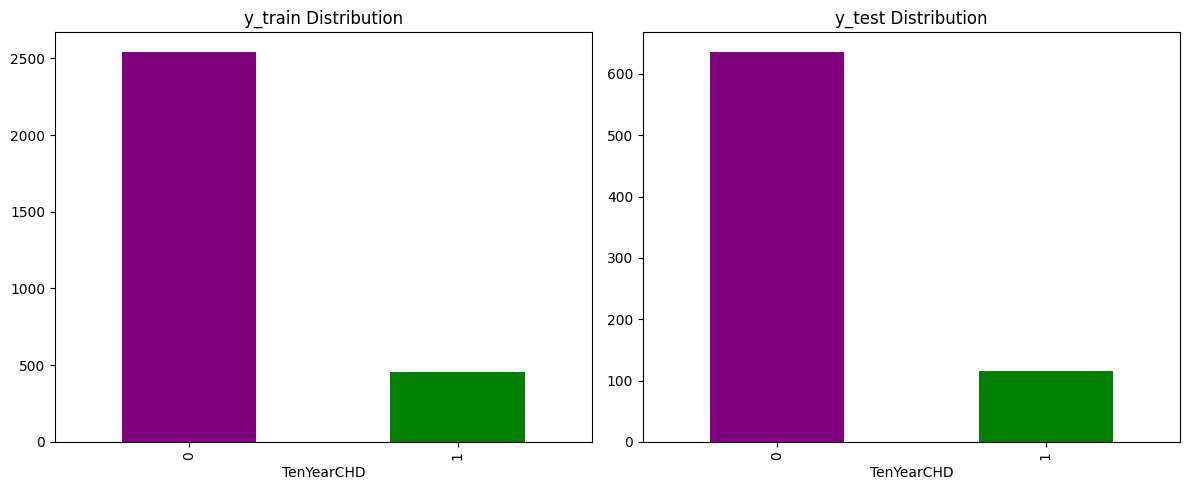

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y,
)
# Data Distribution visualization
plt.figure(figsize=(12, 5))

y_train = y_train.iloc[:, 0] 
y_test = y_test.iloc[:, 0] 
# Plot y_train
plt.subplot(1, 2, 1)
pd.Series(y_train).value_counts().sort_index().plot(kind="bar", color=["purple", "g"])
plt.title("y_train Distribution")

# Plot y_test
plt.subplot(1, 2, 2)
pd.Series(y_test).value_counts().sort_index().plot(kind="bar", color=["purple", "g"])
plt.title("y_test Distribution")
plt.tight_layout()
plt.show()